In [1]:
#CMPE 256 : Semester project : NHL Win or Loss predictions
#Author : Suhani Vaishnav (012489191)

#importing libraries

import numpy as np
import pandas as pd
import sklearn

In [2]:
#Reading the Team stats csv

team = pd.read_csv("/Users/sdnan/Documents/Study/Fall 2018/CMPE256/Project/NHL/Dataset/game_teams_stats.csv")

In [3]:
# Reading the Player stats

plyr = pd.read_csv("/Users/sdnan/Documents/Study/Fall 2018/CMPE256/Project/NHL/Dataset/game_skater_stats.csv")

In [4]:
# Dropping unwanted columns from Player stats table

plyr.drop(['timeOnIce','assists','goals','shots','hits','powerPlayGoals','powerPlayAssists','penaltyMinutes','faceOffWins','faceoffTaken','takeaways','giveaways','shortHandedGoals','shortHandedAssists','blocked','plusMinus','evenTimeOnIce','shortHandedTimeOnIce','powerPlayTimeOnIce'],axis = 1,inplace= True)

In [5]:
# Merging Team and Player tables based on game-d and team-id.

df = pd.merge(team, plyr,  how='left', left_on=['game_id','team_id'], right_on = ['game_id','team_id'])

In [6]:
df.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,player_id
0,2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,8471958
1,2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,8471339
2,2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,8471873
3,2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,8473432
4,2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,8470192


In [7]:
# Dropping categorical column

df.drop(['head_coach'],axis = 1,inplace= True)


In [8]:
# Applying One-hot encoding for Home or Away column

wfh_dummy = pd.get_dummies(df['HoA'],prefix = 'Game')
df = pd.concat([df,wfh_dummy],axis=1)

df = df.drop(['HoA'],1)

In [9]:
# Applying One-hot encoding for Game Settled_in : Rgular time, Overtime or Shootout

Settled_dummy = pd.get_dummies(df['settled_in'],prefix = 'Game')
df = pd.concat([df, Settled_dummy],axis=1)

df = df.drop(['settled_in'],1)

In [10]:
# Creating Lables for Target variable

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

df['won'] = lb.fit_transform(df["won"])

In [11]:
df.head()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,player_id,Game_away,Game_home,Game_OT,Game_REG,Game_SO
0,2012030221,3,0,2,35,44,8,3,0,44.8,17,7,8471958,1,0,1,0,0
1,2012030221,3,0,2,35,44,8,3,0,44.8,17,7,8471339,1,0,1,0,0
2,2012030221,3,0,2,35,44,8,3,0,44.8,17,7,8471873,1,0,1,0,0
3,2012030221,3,0,2,35,44,8,3,0,44.8,17,7,8473432,1,0,1,0,0
4,2012030221,3,0,2,35,44,8,3,0,44.8,17,7,8470192,1,0,1,0,0


In [12]:
# Applying One hot encoding for Players in each game

wf1_dummy = pd.get_dummies(df['player_id'],prefix = 'p')
df = pd.concat([df,wf1_dummy],axis=1)

In [13]:
df.head()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,...,p_8480158,p_8480163,p_8480164,p_8480172,p_8480222,p_8480330,p_8480727,p_8480761,p_8480762,p_8480771
0,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,0
1,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,0
2,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,0
3,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,0
4,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Joining game id and team id to create unique id for each row

df['game-teamid'] = df[['game_id', 'team_id']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

In [15]:
df.head()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,...,p_8480163,p_8480164,p_8480172,p_8480222,p_8480330,p_8480727,p_8480761,p_8480762,p_8480771,game-teamid
0,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,2012030221-3
1,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,2012030221-3
2,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,2012030221-3
3,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,2012030221-3
4,2012030221,3,0,2,35,44,8,3,0,44.8,...,0,0,0,0,0,0,0,0,0,2012030221-3


In [16]:
# Dropping the gmae-id and team-id columns since a new column is already created based on them

df.drop(['game_id','team_id'],inplace = True, axis = 1)

In [17]:
df.head()

,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,...,p_8480163,p_8480164,p_8480172,p_8480222,p_8480330,p_8480727,p_8480761,p_8480762,p_8480771,game-teamid
0,0,2,35,44,8,3,0,44.8,17,7,...,0,0,0,0,0,0,0,0,0,2012030221-3
1,0,2,35,44,8,3,0,44.8,17,7,...,0,0,0,0,0,0,0,0,0,2012030221-3
2,0,2,35,44,8,3,0,44.8,17,7,...,0,0,0,0,0,0,0,0,0,2012030221-3
3,0,2,35,44,8,3,0,44.8,17,7,...,0,0,0,0,0,0,0,0,0,2012030221-3
4,0,2,35,44,8,3,0,44.8,17,7,...,0,0,0,0,0,0,0,0,0,2012030221-3


In [18]:
# Summing the values for each unique ID to obtain all the attibutes in a single row

df= df.groupby(['game-teamid']).sum()


In [19]:
#Dropping player-id since it has been one hot encoded already and converted to columns

df.drop(['player_id'], inplace = True, axis=1)

In [20]:
df.head()

,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,...,p_8480158,p_8480163,p_8480164,p_8480172,p_8480222,p_8480330,p_8480727,p_8480761,p_8480762,p_8480771
game-teamid,,,,,,,,,,,,,,,,,,,,,
2012020001-4,0,18,486,720,108,90,0,783.0,216,144,...,0,0,0,0,0,0,0,0,0,0
2012020001-5,18,54,486,666,180,54,36,1017.0,144,180,...,0,0,0,0,0,0,0,0,0,0
2012020002-52,0,18,504,522,108,108,18,1000.8,342,72,...,0,0,0,0,0,0,0,0,0,0
2012020002-9,18,72,666,378,252,36,18,799.2,144,90,...,0,0,0,0,0,0,0,0,0,0
2012020003-16,18,90,396,396,180,90,18,885.6,126,18,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# This is to obtain original value for team stats since post groupby and summing, the values were added for each of the 18 team players

df.loc[:,"won":"Game_SO"] = df.loc[:,"won":"Game_SO"]/18


In [22]:
df.head()

,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,...,p_8480158,p_8480163,p_8480164,p_8480172,p_8480222,p_8480330,p_8480727,p_8480761,p_8480762,p_8480771
game-teamid,,,,,,,,,,,,,,,,,,,,,
2012020001-4,0.0,1.0,27.0,40.0,6.0,5.0,0.0,43.5,12.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2012020001-5,1.0,3.0,27.0,37.0,10.0,3.0,2.0,56.5,8.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2012020002-52,0.0,1.0,28.0,29.0,6.0,6.0,1.0,55.6,19.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2012020002-9,1.0,4.0,37.0,21.0,14.0,2.0,1.0,44.4,8.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2012020003-16,1.0,5.0,22.0,22.0,10.0,5.0,1.0,49.2,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Saving the preprocessed table created by merging Team and Player stats

df.to_csv('team_players_merged.csv')

In [24]:
#Reading and saving the team-player stats merged table into a table

df = pd.read_csv('team_players_merged.csv')

In [25]:
df.dtypes

game-teamid                object
won                       float64
goals                     float64
shots                     float64
hits                      float64
pim                       float64
powerPlayOpportunities    float64
powerPlayGoals            float64
faceOffWinPercentage      float64
giveaways                 float64
takeaways                 float64
Game_away                 float64
Game_home                 float64
Game_OT                   float64
Game_REG                  float64
Game_SO                   float64
p_8448208                   int64
p_8457981                   int64
p_8458529                   int64
p_8458537                   int64
p_8458590                   int64
p_8458938                   int64
p_8458951                   int64
p_8459053                   int64
p_8459442                   int64
p_8459444                   int64
p_8459454                   int64
p_8459457                   int64
p_8459492                   int64
p_8459514     

In [26]:
df.describe()

,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,...,p_8480158,p_8480163,p_8480164,p_8480172,p_8480222,p_8480330,p_8480727,p_8480761,p_8480762,p_8480771
count,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,...,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000,14882.000000
mean,0.499963,2.720203,30.298534,23.820036,9.918522,3.127641,0.588100,49.996026,8.593327,6.732048,...,0.003225,0.000067,0.000336,0.003830,0.001478,0.000269,0.000067,0.000067,0.000067,0.000067
std,0.499982,1.620274,6.815432,8.830269,7.655579,1.526089,0.750032,7.174373,4.805025,3.748184,...,0.056703,0.008197,0.018327,0.061771,0.038421,0.016393,0.008197,0.008197,0.008197,0.008197
min,0.000000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,20.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,26.000000,18.000000,6.000000,2.000000,0.000000,45.100000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.444444,3.000000,30.000000,23.000000,8.000000,3.000000,0.000000,50.000000,8.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,35.000000,29.000000,12.000000,4.000000,1.000000,54.800000,11.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,64.000000,80.000000,129.000000,11.000000,6.000000,79.200000,36.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#Droppingthe Object dimension : game-teamid as it will no longer be used for building classifier

df.drop(['game-teamid'],inplace = True, axis=1)

In [28]:
#Segregatingt the "won" column for setting the target variable
target_df = pd.DataFrame(df['won'].astype(int))

In [29]:
target_df.dtypes

won    int32
dtype: object

In [30]:
df = df.drop(['won'],1)

In [31]:
df.head()

,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,Game_away,...,p_8480158,p_8480163,p_8480164,p_8480172,p_8480222,p_8480330,p_8480727,p_8480761,p_8480762,p_8480771
0,1.0,27.0,40.0,6.0,5.0,0.0,43.5,12.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,27.0,37.0,10.0,3.0,2.0,56.5,8.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,28.0,29.0,6.0,6.0,1.0,55.6,19.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,37.0,21.0,14.0,2.0,1.0,44.4,8.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,22.0,22.0,10.0,5.0,1.0,49.2,7.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
 #Splitting the Datafarame intp train and test dataframes : 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df, target_df, test_size=0.2)

In [33]:
#Building Classification Model: XGBoost 
print("XGBoost")

from numpy import loadtxt
from xgboost import XGBClassifier

#Training the model
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, Y_train)

# Predictions
y_pred = xgboost_model.predict(X_test)

#Calculating Accuracy and F1 score for the model
from sklearn.metrics import accuracy_score
XGB_accuracy = accuracy_score(Y_test, y_pred)
print(" XGBoost Accuracy:", XGB_accuracy)

from sklearn.metrics import f1_score
XGB_F1 = f1_score(Y_test,y_pred,average= 'weighted')
print("XGBoost F1 score =",XGB_F1)


XGBoost


C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 XGBoost Accuracy: 0.7752771246221027
XGBoost F1 score = 0.7752731689981665


In [34]:
# Building Classification Model : Random Forest Classifier

print("Random Forest")

from sklearn.ensemble import RandomForestClassifier

#Training the model
RF= RandomForestClassifier(n_estimators=400,n_jobs=-1,criterion='gini',class_weight = 'balanced')
RF.fit(X_train,Y_train)

#Predictions
RF_Y = RF.predict(X_test)

#Calculating Accuracy and F1 score for the model
from sklearn.metrics import accuracy_score
RF_Accuracy = accuracy_score(Y_test, RF_Y)
print("Accuracy for Random Forest=",RF_Accuracy)

from sklearn.metrics import f1_score
RF_F1 = f1_score(Y_test,RF_Y,average= 'weighted')
print("F1 score for Random Forest=",RF_F1)


Random Forest


C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy for Random Forest= 0.7601612361437688
F1 score for Random Forest= 0.7601159304394316


In [35]:
# Building Classification model : Adaboost

print( "AdaBoost")

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier

# Training the model
AdaB_model=AdaBoostClassifier(RandomForestClassifier(n_estimators=400,n_jobs=-1,criterion='gini',class_weight = 'balanced'))
AdaB_model.fit(X_train,Y_train)

#PRedictions
AdaB_Y = AdaB_model.predict(X_test)

# Calculating Accuracy and F1 score
from sklearn.metrics import accuracy_score
AdaB_Accuracy = accuracy_score(Y_test, AdaB_Y)
print(" Accuracy for AdaBoost =",AdaB_Accuracy)

from sklearn.metrics import f1_score
AdaB_F1 = f1_score(Y_test,AdaB_Y,average= 'weighted')
print("F1Score for AdaBoost =",AdaB_F1)

AdaBoost


C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Accuracy for AdaBoost = 0.7621766879408801
F1Score for AdaBoost = 0.7621317629567474


In [36]:
# Building Classification model : Logistic Regression

print("Logistic Regression")
from sklearn.linear_model import LogisticRegression

# Training the model
LR_model = LogisticRegression(random_state=256, solver='lbfgs').fit(X_train,Y_train)

# Predictions
pred_LR= LR_model.predict(X_test)

#Calculating Accuracy and F1 score

from sklearn.metrics import accuracy_score
LR_Accuracy = accuracy_score(Y_test, pred_LR)
print("Accuracy for Logistic Regression=",LR_Accuracy)

from sklearn.metrics import f1_score
SGD_F1 = f1_score(Y_test, pred_LR, average= 'weighted') 
print("F1Score for Logistic Regression=",SGD_F1)       
        

Logistic Regression


C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Logistic Regression= 0.7735975814578435
F1Score for Logistic Regression= 0.773605398797486


C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [37]:
# Training the model
LR2_model = LogisticRegression(random_state=256, solver='liblinear').fit(X_train,Y_train)

# Predictions
pred_LR2= LR2_model.predict(X_test)

#Calculating Accuracy and F1 score

from sklearn.metrics import accuracy_score
LR2_Accuracy = accuracy_score(Y_test, pred_LR2)
print("Accuracy for Logistic Regression_ solver2 =",LR2_Accuracy)

from sklearn.metrics import f1_score
LR_F1 = f1_score(Y_test, pred_LR2, average= 'weighted') 
print("F1Score for Logistic Regression=",SGD_F1)       
        

C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Logistic Regression_ solver2 = 0.7571380584481021
F1Score for Logistic Regression= 0.773605398797486


In [41]:
# Building Classification Model : KNN
from sklearn.neighbors import KNeighborsClassifier

Knn_model = KNeighborsClassifier().fit(X_train,Y_train)

# Predictions
pred_knn= Knn_model.predict(X_test)

#Calculating Accuracy and F1 score

from sklearn.metrics import accuracy_score
Knn_Accuracy = accuracy_score(Y_test, pred_LR2)
print("Accuracy for KNearest Neighbours Classifier =",Knn_Accuracy)

from sklearn.metrics import f1_score
Knn_F1 = f1_score(Y_test, pred_knn, average= 'weighted') 
print("F1Score for K NEarest NEighbours classifier=",Knn_F1) 

C:\Users\sdnan\Anaconda2\envs\py36_new\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy for KNearest Neighbours Classifier = 0.7571380584481021
F1Score for K NEarest NEighbours classifier= 0.6338077643011134


In [40]:
# Extracting important features
fimportances = RF.feature_importances_

# Making it important v/s the max value
feature_importance = 100.0 * (fimportances / fimportances.max())
sorted_idex = np.argsort(feature_importance)
feature_names = list(X_test.columns.values)
feature_sorted = [feature_names[indice] for indice in sorted_idex]
pos = np.arange(sorted_idex.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_sorted[::-1][:10]:
    print(feature)

Top 10 features are: 
goals
faceOffWinPercentage
hits
shots
takeaways
giveaways
pim
powerPlayGoals
powerPlayOpportunities
Game_REG


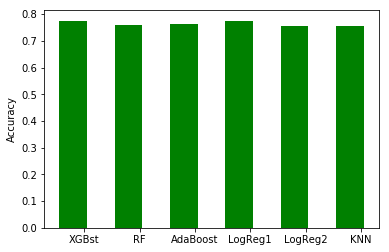

In [43]:
# Plotting the accuracies
import matplotlib.pyplot as plt

x_axis = np.arange(6)
y_axis = [XGB_accuracy, RF_Accuracy, AdaB_Accuracy, LR_Accuracy, LR2_Accuracy, Knn_Accuracy]

plt.bar(x_axis, y_axis, width=0.5, color = 'g')
plt.xticks(x_axis+2/10.,('XGBst','RF',
           'AdaBoost','LogReg1','LogReg2',
            'KNN'))
plt.ylabel('Accuracy')
plt.savefig('Accuracyplot _Approach2.png')
plt.show()



